<a href="https://colab.research.google.com/github/AnhVietPham/Deep-Learning/blob/main/DLTensorflow/RNN/SequenceModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l==0.17.0

In [19]:
import tensorflow as tf
from d2l import tensorflow as d2l

# **TEST**

In [25]:
T_test = 10
time_test = tf.range(1, T_test + 1, dtype=tf.float32)
time_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)>

In [54]:
print(0.1 * time_test)
print()
print(tf.sin(0.1 * time_test))
print()
print(tf.random.normal([T_test], 0, 0.002))

tf.Tensor(
[0.1        0.2        0.3        0.4        0.5        0.6
 0.7        0.8        0.90000004 1.        ], shape=(10,), dtype=float32)

tf.Tensor(
[0.09983342 0.19866933 0.29552022 0.38941833 0.47942555 0.5646425
 0.64421767 0.71735615 0.7833269  0.841471  ], shape=(10,), dtype=float32)

tf.Tensor(
[ 2.7476152e-04 -5.8756654e-05  3.2746734e-03 -1.4536970e-03
  4.4547068e-04 -3.6901527e-04 -2.1352142e-03 -1.9544733e-03
 -2.1238645e-04  1.8409991e-03], shape=(10,), dtype=float32)


In [38]:
x_test = tf.sin(0.0001 * time_test) + tf.random.normal([T_test], 0, 0.002)
x_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 0.0006856 ,  0.00014131,  0.00276627,  0.00030543,  0.00056582,
        0.00100934,  0.00118048, -0.00254245,  0.00144879,  0.00134369],
      dtype=float32)>

In [40]:
tau_test = 2
features_test = tf.Variable(tf.zeros((T_test - tau_test, tau_test)))
features_test

<tf.Variable 'Variable:0' shape=(8, 2) dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [44]:
print(features_test[:, 0])
print(features_test[:, 1])

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0.], shape=(8,), dtype=float32)
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0.], shape=(8,), dtype=float32)


In [46]:
print(x_test[0: T_test - tau_test + 0])
print()
print(x_test[1: T_test - tau_test + 1])

tf.Tensor(
[ 0.0006856   0.00014131  0.00276627  0.00030543  0.00056582  0.00100934
  0.00118048 -0.00254245], shape=(8,), dtype=float32)

tf.Tensor(
[ 0.00014131  0.00276627  0.00030543  0.00056582  0.00100934  0.00118048
 -0.00254245  0.00144879], shape=(8,), dtype=float32)


In [49]:
x_test[tau_test:]

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([ 0.00276627,  0.00030543,  0.00056582,  0.00100934,  0.00118048,
       -0.00254245,  0.00144879,  0.00134369], dtype=float32)>

In [50]:
tf.reshape(x_test[tau_test:], (-1,1))

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[ 0.00276627],
       [ 0.00030543],
       [ 0.00056582],
       [ 0.00100934],
       [ 0.00118048],
       [-0.00254245],
       [ 0.00144879],
       [ 0.00134369]], dtype=float32)>

In [55]:
for i in range(tau_test):
    features_test[:, i].assign(x_test[i: T_test - tau_test + i])
labels_test = tf.reshape(x_test[tau_test:], (-1, 1))

In [57]:
print(features_test)
print()
print(labels_test)

<tf.Variable 'Variable:0' shape=(8, 2) dtype=float32, numpy=
array([[ 0.0006856 ,  0.00014131],
       [ 0.00014131,  0.00276627],
       [ 0.00276627,  0.00030543],
       [ 0.00030543,  0.00056582],
       [ 0.00056582,  0.00100934],
       [ 0.00100934,  0.00118048],
       [ 0.00118048, -0.00254245],
       [-0.00254245,  0.00144879]], dtype=float32)>

tf.Tensor(
[[ 0.00276627]
 [ 0.00030543]
 [ 0.00056582]
 [ 0.00100934]
 [ 0.00118048]
 [-0.00254245]
 [ 0.00144879]
 [ 0.00134369]], shape=(8, 1), dtype=float32)


# **PRACTICE**

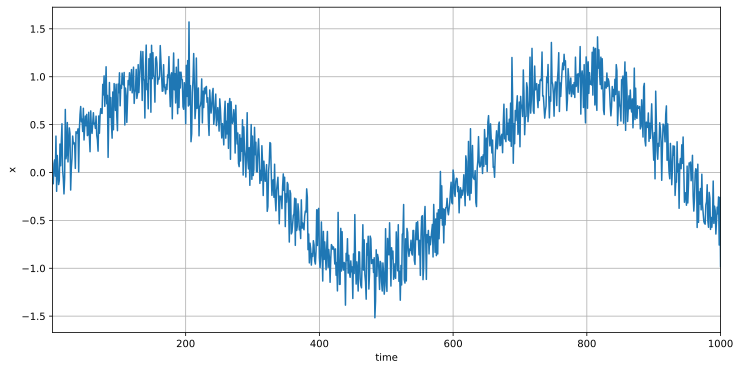

In [79]:
T = 1000
time = tf.range(1, T + 1, dtype=tf.float32)
x = tf.sin(0.01 * time) + tf.random.normal([T], 0, 0.2)
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(12,6))

In [80]:
tau = 4
features = tf.Variable(tf.zeros((T - tau, tau)))
features

<tf.Variable 'Variable:0' shape=(996, 4) dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [81]:
x.shape

TensorShape([1000])

In [82]:
for i in range(tau):
  features[:, i].assign(x[i:T- tau + i])
labels = tf.reshape(x[tau:], (-1, 1))

In [83]:
features

<tf.Variable 'Variable:0' shape=(996, 4) dtype=float32, numpy=
array([[-0.06741957, -0.1178274 ,  0.09069998,  0.13119479],
       [-0.1178274 ,  0.09069998,  0.13119479, -0.03848112],
       [ 0.09069998,  0.13119479, -0.03848112,  0.37946296],
       ...,
       [-0.49979448, -0.36242092, -0.43271193, -0.25517467],
       [-0.36242092, -0.43271193, -0.25517467, -0.7574376 ],
       [-0.43271193, -0.25517467, -0.7574376 , -0.2614205 ]],
      dtype=float32)>

In [84]:
labels.shape

TensorShape([996, 1])

In [85]:
batch_size, n_train = 16, 600
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)

In [86]:
def get_net():
    net = tf.keras.Sequential([
          tf.keras.layers.Dense(100, activation='relu'),
          tf.keras.layers.Dense(1)])
    return net

loss = tf.keras.losses.MeanSquaredError()

In [87]:
def train(net, train_iter, loss, epochs, lr):
    trainer = tf.keras.optimizers.Adam()
    for epoch in range(epochs):
        for X, y in train_iter:
            with tf.GradientTape() as g:
                out = net(X)
                l = loss(y, out)
                params = net.trainable_variables
                grads = g.gradient(l, params)
            trainer.apply_gradients(zip(grads, params))
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.066620
epoch 2, loss: 0.054804
epoch 3, loss: 0.054114
epoch 4, loss: 0.052589
epoch 5, loss: 0.052487


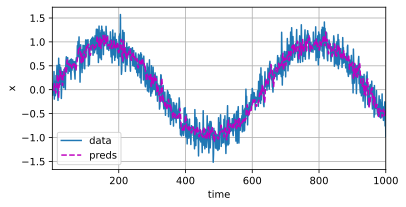

In [90]:
preds = net(features)
d2l.plot([time, time[tau:]], [x.numpy(), preds.numpy()], 'time',
         'x', legend=['data', 'preds'], xlim=[1, 1000], figsize=(6, 3))